In [1]:
from scipy import stats



In [2]:
! python test_cross_dataset.py --help

usage: test_cross_dataset.py [-h] [--dist_dir DIST_DIR] [--ref_dir REF_DIR]
                             [--names_info NAMES_INFO]
                             [--model_file MODEL_FILE] [--save_path SAVE_PATH]
                             [--patching_method PATCHING_METHOD]
                             [--number_of_samples NUMBER_OF_SAMPLES]

PyTorch WaDIQaM-FR test on the whole cross dataset

optional arguments:
  -h, --help            show this help message and exit
  --dist_dir DIST_DIR   distorted images dir.
  --ref_dir REF_DIR     reference images dir.
  --names_info NAMES_INFO
                        .mat file that includes image names in the dataset.
  --model_file MODEL_FILE
                        model file (default: checkpoints/WaDIQaM-FR-
                        KADID-10K-EXP1000-5-lr=0.0001-bs=4)
  --save_path SAVE_PATH
                        save path (default: scores)
  --patching_method PATCHING_METHOD
                        random or variance
  --number_of_samples N

## test on LIVE (500 random samples)

In [ ]:
%%time
! python test_cross_dataset.py --patching_method=random  --dist_dir=datasets/LIVE/databaserelease2  --model_file=SAVED_MODELS/randomPatch-WaDIQaM-NR-LIVE-EXP44-5-lr=0.0001-bs=4 --names_info=LIVEfullinfo.mat

In [6]:
import numpy as np
predicts = np.load('scores.npy')

In [7]:
import h5py

Info = h5py.File("LIVEfullinfo.mat", 'r')
scale = Info['subjective_scores'][0, :].max()
mos = Info['subjective_scores'][0, :] / scale #
mos_std = Info['subjective_scoresSTD'][0, :] / scale

In [8]:
rands_index = []
with open("tmp_imgIndex.txt", "r") as f:
  for line in f:
    rands_index.append(int(line.strip()))

In [9]:
mos_ = []
mos_std_ = []
for i in rands_index:
    mos_.append(mos[i])
    mos_std_.append(mos_std[i])

In [10]:
len(predicts)

500

In [11]:
len(mos_)

500

In [12]:

stats.spearmanr(mos_, predicts)

SpearmanrResult(correlation=0.9392773571094283, pvalue=1.8065713525191626e-233)

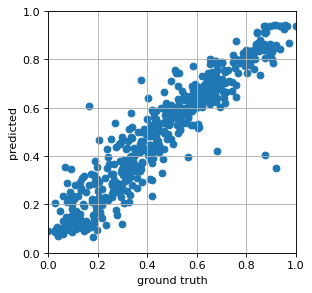

In [13]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(4,4), dpi=80)

# fig, ax = plt.subplots(figsize=(12, 12))

plt.xlabel("ground truth")
plt.ylabel("predicted")

plt.grid()

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.scatter(mos_, predicts)
plt.show()

##  test on LIVE (all)

In [ ]:
%%time
! python test_cross_dataset.py --patching_method=random  --dist_dir=datasets/LIVE/databaserelease2  --model_file=SAVED_MODELS/randomPatch-WaDIQaM-NR-LIVE-EXP44-5-lr=0.0001-bs=4 --names_info=LIVEfullinfo.mat  --number_of_samples=-1

In [15]:
predicts = np.load('scores.npy')

In [16]:
import h5py

Info = h5py.File("LIVEfullinfo.mat", 'r')
scale = Info['subjective_scores'][0, :].max()
mos = Info['subjective_scores'][0, :] / scale #
mos_std = Info['subjective_scoresSTD'][0, :] / scale

In [17]:
rands_index = []
with open("tmp_imgIndex.txt", "r") as f:
  for line in f:
    rands_index.append(int(line.strip()))

In [18]:
mos_ = []
mos_std_ = []
for i in rands_index:
    mos_.append(mos[i])
    mos_std_.append(mos_std[i])

In [19]:
len(predicts)

779

In [20]:
len(mos_)

779

In [21]:
stats.spearmanr(mos_, predicts)

SpearmanrResult(correlation=0.9296594179371849, pvalue=0.0)

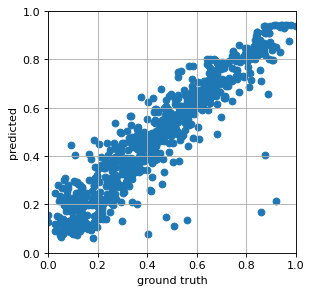

In [22]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(4,4), dpi=80)

# fig, ax = plt.subplots(figsize=(12, 12))

plt.xlabel("ground truth")
plt.ylabel("predicted")

plt.grid()

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.scatter(mos_, predicts)
plt.show()

## test on TID2013 (500 random samples)

In [ ]:
! python test_cross_dataset.py --patching_method=random  --dist_dir=datasets/TID2013/distorted_images  --model_file=SAVED_MODELS/randomPatch-WaDIQaM-NR-LIVE-EXP44-5-lr=0.0001-bs=4 --names_info=TID2013fullinfo.mat

In [27]:
import numpy as np
predicts = np.load('scores.npy')

In [28]:
import h5py

Info = h5py.File("TID2013fullinfo.mat", 'r')
scale = Info['subjective_scores'][0, :].max()
mos = Info['subjective_scores'][0, :] / scale #
mos_std = Info['subjective_scoresSTD'][0, :] / scale

In [29]:
rands_index = []
with open("tmp_imgIndex.txt", "r") as f:
  for line in f:
    rands_index.append(int(line.strip()))

In [30]:
mos_ = []
mos_std_ = []
for i in rands_index:
    mos_.append(mos[i])
    mos_std_.append(mos_std[i])

In [31]:
predicts = 1 - predicts
len(predicts)

500

In [32]:
predicts[:10]

array([0.94299348, 0.87940039, 0.62681967, 0.79461695, 0.86930574,
       0.67384201, 0.82139656, 0.90291157, 0.84988995, 0.42615104])

In [33]:
mos_[:10]

[0.5189963253487176,
 0.8352367315425357,
 0.7423544104825284,
 0.7979662586339057,
 0.7179486824067234,
 0.4486706245521042,
 0.7674476629023785,
 0.44206567798078533,
 0.8572167184851177,
 0.4371670670294651]

In [34]:
len(mos_)

500

In [35]:
stats.spearmanr(mos_, predicts)

SpearmanrResult(correlation=0.35095018049215077, pvalue=6.14197293392177e-16)

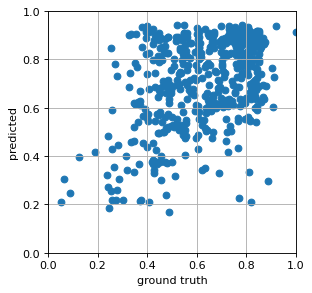

In [36]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(4,4), dpi=80)

# fig, ax = plt.subplots(figsize=(12, 12))

plt.xlabel("ground truth")
plt.ylabel("predicted")

plt.grid()

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.scatter(mos_, predicts)
plt.show()

##  test on TID (all)

In [ ]:
! python test_cross_dataset.py --patching_method=random  --dist_dir=datasets/TID2013/distorted_images  --model_file=SAVED_MODELS/randomPatch-WaDIQaM-NR-LIVE-EXP44-5-lr=0.0001-bs=4 --names_info=TID2013fullinfo.mat --number_of_samples=-1

In [ ]:
predicts = np.load('scores.npy')

In [39]:
import h5py

Info = h5py.File("TID2013fullinfo.mat", 'r')
scale = Info['subjective_scores'][0, :].max()
mos = Info['subjective_scores'][0, :] / scale #
mos_std = Info['subjective_scoresSTD'][0, :] / scale

In [40]:
rands_index = []
with open("tmp_imgIndex.txt", "r") as f:
  for line in f:
    rands_index.append(int(line.strip()))

In [41]:
mos_ = []
mos_std_ = []
for i in rands_index:
    mos_.append(mos[i])
    mos_std_.append(mos_std[i])

In [42]:
predicts = 1 - predicts
len(predicts)

3000

In [43]:
len(mos_)

3000

In [44]:
stats.spearmanr(mos_, predicts)

SpearmanrResult(correlation=0.3456843855900709, pvalue=5.953382532885358e-85)

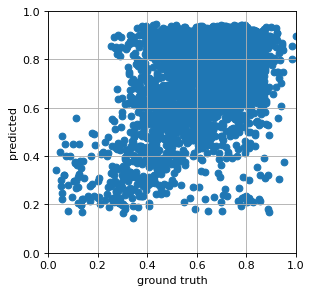

In [45]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(4,4), dpi=80)

# fig, ax = plt.subplots(figsize=(12, 12))

plt.xlabel("ground truth")
plt.ylabel("predicted")

plt.grid()

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.scatter(mos_, predicts)
plt.show()

## test on flipped images

In [46]:
from argparse import ArgumentParser
import torch
from torch import nn
import torch.nn.functional as F
from PIL import Image
from main import RandomCropPatches, VarianceThresholdPatchSelection, NRnet
import numpy as np
import h5py, os , random

In [48]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = NRnet(weighted_average=True).to(device)

model.load_state_dict(torch.load("SAVED_MODELS/variancePatch-WaDIQaM-NR-LIVE-EXP41-5-lr=0.0001-bs=4"))

<All keys matched successfully>

In [49]:
import glob

im_names = glob.glob('flipped_test/*')
im_names

['flipped_test\\a.bmp',
 'flipped_test\\a1.png',
 'flipped_test\\b.bmp',
 'flipped_test\\b1.png',
 'flipped_test\\c.bmp',
 'flipped_test\\c1.png',
 'flipped_test\\d.bmp',
 'flipped_test\\d1.png',
 'flipped_test\\e.bmp',
 'flipped_test\\e1.png']

In [50]:
model.eval()
scores = []   
with torch.no_grad():
        for i in range(len(im_names)):
            im = Image.open(os.path.join( im_names[i])).convert('RGB')
            # ref = Image.open(os.path.join(args.ref_dir, ref_names[i])).convert('RGB')
            # data = RandomCropPatches(im, ref)
            data = RandomCropPatches(im)
            
            dist_patches = data.unsqueeze(0).to(device)
            # ref_patches = data[1].unsqueeze(0).to(device)
            # score = model((dist_patches, ref_patches))

            score = model((dist_patches))
            scores.append(score.item())


            
 

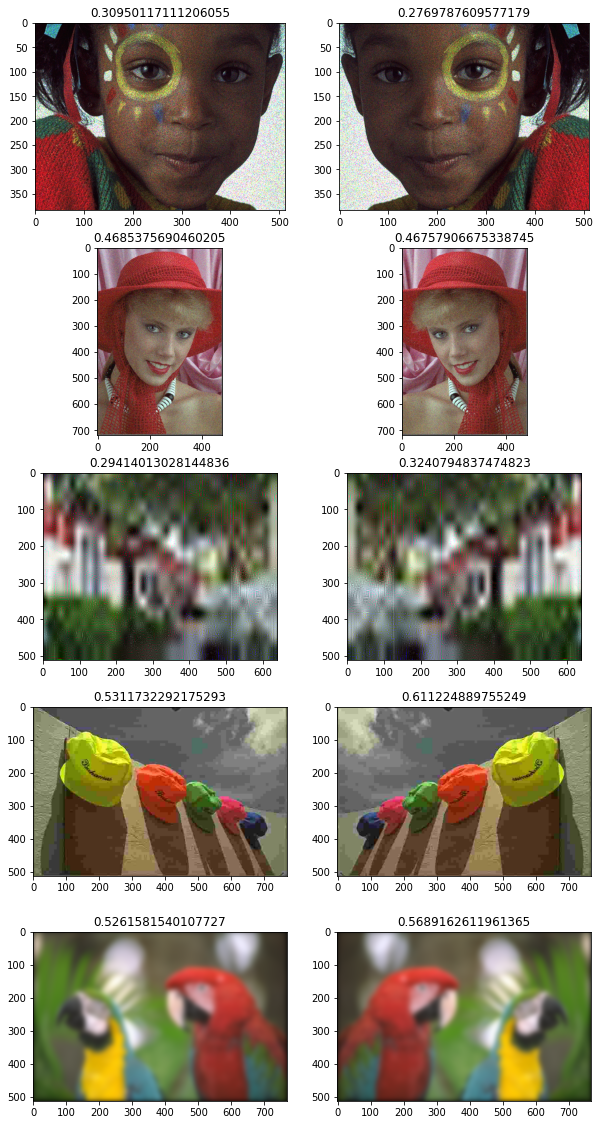

In [51]:
import cv2
f, axarr = plt.subplots(5,2 , figsize=(10, 20))
for i in range(len(im_names)//2):
    a = cv2.imread(im_names[i*2])
    b = cv2.imread(im_names[i*2+1])
    a = cv2.cvtColor(a, cv2.COLOR_RGB2BGR)
    b = cv2.cvtColor(b, cv2.COLOR_RGB2BGR)
    axarr[i,0].imshow(a)
    axarr[i,0].set_title(str(scores[i*2])) 
    axarr[i,1].imshow(b)
    axarr[i,1].set_title(str(scores[i*2+1])) 
  